In [7]:
!conda upgrade --all -y

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiohappyeyeballs-2.4.0     |  py312haa95532_0          23 KB
    aiohttp-3.10.5             |  py312h827c3e9_0         826 KB
    anaconda-navigator-2.6.2   |  py312haa95532_0         5.1 MB
    astropy-6.1.3              |  py312h827c3e9_0         9.2 MB
    astropy-iers-data-0.2024.9.2.0.33.23|  py312haa95532_0         1.6 MB
    black-24.8.0               |  py312haa95532_0         406 KB
    ca-certificates-2024.7.2   |       haa95532_0         128 KB
    certifi-2024.8.30          |  py312haa95532_0         164 KB
    cffi-1.17.1                |  py312h827c3e9_0         308 KB
    charset-normalizer-3.3.2   |     pyhd3eb1b0_0          44 KB
    cloudpickle-3.0.0          |  py312haa9553


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




<>:62: SyntaxWarning: invalid escape sequence '\P'
<>:62: SyntaxWarning: invalid escape sequence '\P'
C:\Users\admin\AppData\Local\Temp\ipykernel_29420\1077332686.py:62: SyntaxWarning: invalid escape sequence '\P'
  fitted_curve_points.to_csv('E:\Project\cross-sectional project/fitted_curve_points.csv', index=False)


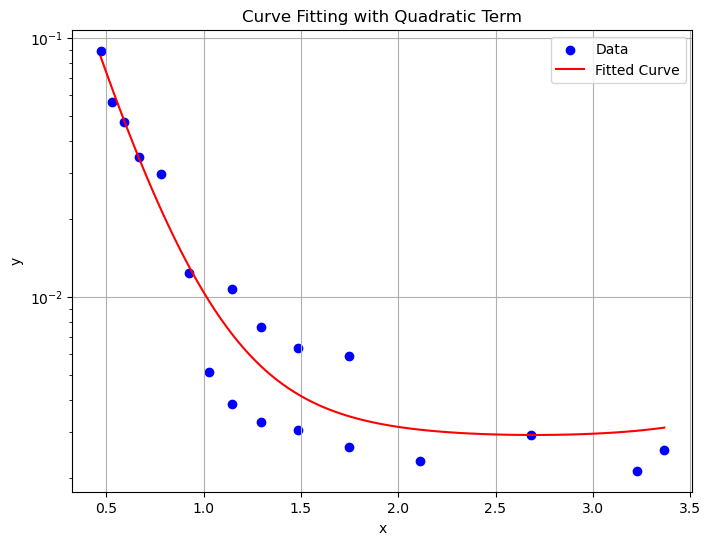

Fitted Parameters: [ 1.13635814e+00 -6.11787823e+00  1.13456306e+00  2.62947135e-03]
Fitted curve points saved to 'fitted_curve_points.csv'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Initial data
data = {
    'x': [3.22581, 2.68097, 1.7452, 1.48588, 1.29366, 1.14548, 0.92336, 0.77942, 0.66979, 0.59067, 0.52826, 0.47081],
    'y': [0.00213, 0.00292, 0.00589, 0.00633, 0.00762, 0.0107, 0.01239, 0.0297, 0.0347, 0.0475, 0.0564, 0.0892]
}

# Additional data points provided
additional_data = {
    'x': [3.367, 2.11416, 1.7452, 1.48588, 1.29366, 1.14548, 1.02775],
    'y': [0.00257, 0.00233, 0.00264, 0.00305, 0.00328, 0.00384, 0.00511]
}

# Combine the initial and additional data
combined_data = {
    'x': data['x'] + additional_data['x'],
    'y': data['y'] + additional_data['y']
}

# Create a DataFrame
df_combined = pd.DataFrame(combined_data)

# Define an exponential function with a quadratic term for fitting
def exp_func(x, a, b, c, d):
    return a * np.exp(b * x + c * x**2) + d

# Initial guesses for the parameters
initial_guess = [1.0, -1.0, 0.1, 1.0]

# Bounds for the parameters
param_bounds = ([0, -np.inf, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf])

# Curve fitting with increased maxfev
popt, pcov = curve_fit(exp_func, df_combined['x'], df_combined['y'], p0=initial_guess, bounds=param_bounds, maxfev=10000)

# Generate x values for the fitted curve
x_fitted_combined = np.linspace(min(df_combined['x']), max(df_combined['x']), 100)
y_fitted_combined = exp_func(x_fitted_combined, *popt)

# Plotting the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['x'], df_combined['y'], label='Data', color='blue')
plt.semilogy(x_fitted_combined, y_fitted_combined, label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting with Quadratic Term')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame for the fitted curve points
fitted_curve_points = pd.DataFrame({
    'x': x_fitted_combined,
    'y': y_fitted_combined
})

# Save the fitted curve points to a CSV file
fitted_curve_points.to_csv('E:\\Project\\cross-sectional project\\fitted_curve_points.csv', index=False)

print("Fitted Parameters:", popt)
print("Fitted curve points saved to 'fitted_curve_points.csv'")
